##### importing necessary libraries

In [28]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

#### loading datasets

In [29]:
df=pd.read_csv(r'E:/ML/Datasets/titanic.csv')

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

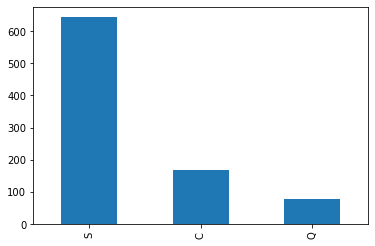

In [36]:
df['Embarked'].value_counts().plot(kind='bar')

### Imputation

In [37]:
df['Cabin']=np.where(df['Cabin'].isnull(),'M',df['Cabin'])
df['Cabin']=df['Cabin'].apply(lambda x:x[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [38]:
si=SimpleImputer()
df['Age']=si.fit_transform(df[['Age']])

In [39]:
#simple imputer strategy = 'most_frequent'
simf = SimpleImputer(strategy='most_frequent')
df['Embarked']=simf.fit_transform(df[['Embarked']])

In [40]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

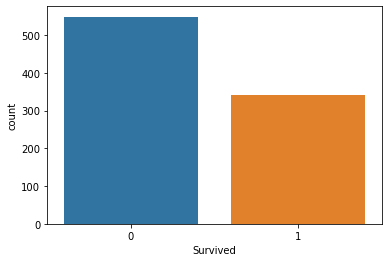

In [41]:
# df['Survived'].value_counts().plot(kind='bar')
import seaborn as sns
sns.countplot(df['Survived'])

### Analyzing Every Column in terms of Survive

##### PCLASS

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

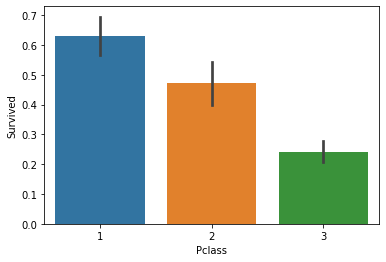

In [42]:
# df.groupby('Pclass')['Survived'].value_counts().plot(kind='bar') #------> in terms of value
# in terms of percentage
sns.barplot(y='Survived',x='Pclass',data=df)

<AxesSubplot:ylabel='Pclass'>

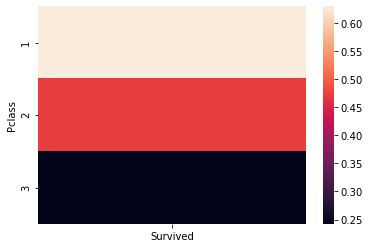

In [43]:
sns.heatmap(pd.DataFrame(df.groupby('Pclass').mean()['Survived']))

#### SEX

E:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

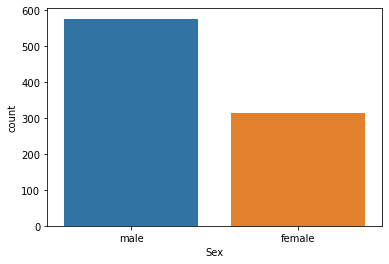

In [44]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

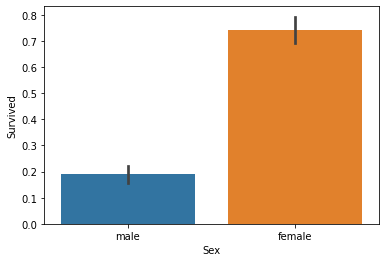

In [45]:
sns.barplot(x='Sex',y='Survived',data=df)

##### PCLASS + SEX

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

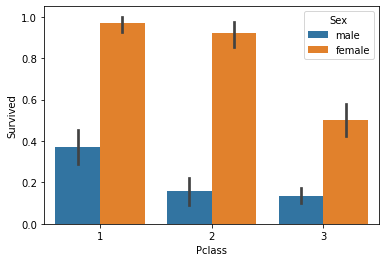

In [46]:
sns.barplot(x='Pclass',y='Survived',data=df,hue='Sex')

##### Fare + Sex

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

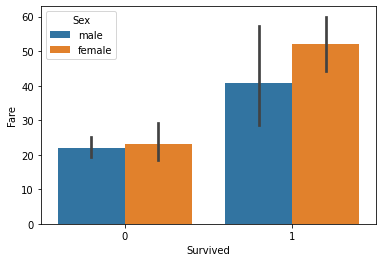

In [47]:
sns.barplot(x='Survived',y='Fare',data=df,hue='Sex')

#### Age binning

In [48]:
# making bins
cat=['Younger','Adult','Old']
bins = [0,18,45,80]

In [49]:
df['Age_cat']=pd.cut(df['Age'],bins=bins,labels=cat)

<AxesSubplot:>

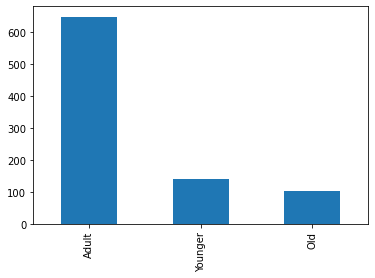

In [50]:
df['Age_cat'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

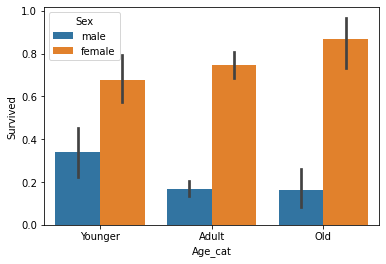

In [51]:
sns.barplot(x='Age_cat',y='Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='Age_cat', ylabel='Fare'>

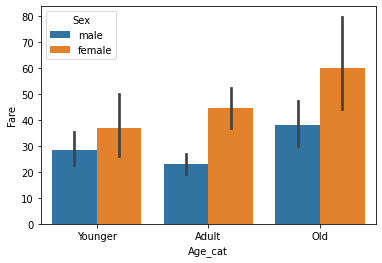

In [52]:
sns.barplot(x='Age_cat',y='Fare',data=df,hue='Sex')

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

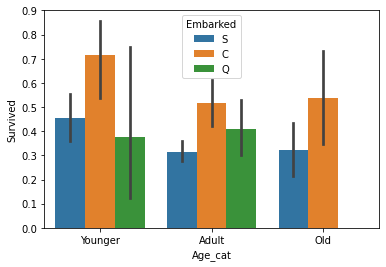

In [53]:
sns.barplot(x='Age_cat',y='Survived',data=df,hue='Embarked')

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

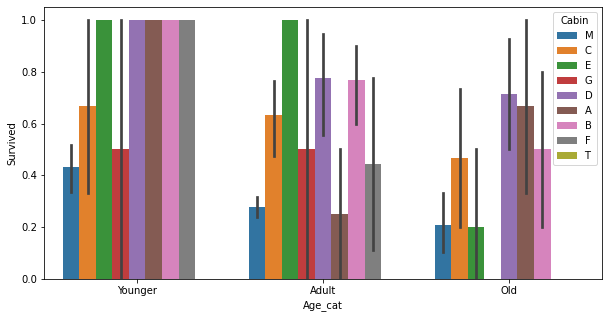

In [57]:
plt.figure(figsize = (10,5))
sns.barplot(x='Age_cat',y='Survived',data=df,hue='Cabin')

In [55]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult


In [27]:
# Now encoding
# Sex,Cabin,Embarked=LabelEncoding
encode = LabelEncoder()
df['Sex']=encode.fit_transform(df['Sex'])
df['Cabin']=encode.fit_transform(df['Cabin'])
df['Embarked']=encode.fit_transform(df['Embarked'])